# Convolutional Neural Networks

## Fashion-MNIST classification

[Fashion MNIST Github Repo](https://github.com/zalandoresearch/fashion-mnist)

### Data load and preprocessing

In [1]:
%%capture
!pip install tensorflow

In [2]:
#Import required packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Load train and test data
((X_train, y_train),(X_test, y_test)) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 0us/step


In [4]:
#Dimensions check
print("Fashion MNIST train:", X_train.shape)
print("Fashion MNIST test:", X_test.shape)

Fashion MNIST train: (60000, 28, 28)
Fashion MNIST test: (10000, 28, 28)


In [5]:
#Target labels
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**There are 10 different classes of images:**

* **0**: **T-shirt/top**;   
* **1**: **Trouser**;   
* **2**: **Pullover**;   
* **3**: **Dress**;
* **4**: **Coat**;
* **5**: **Sandal**;
* **6**: **Shirt**;
* **7**: **Sneaker**;
* **8**: **Bag**;
* **9**: **Ankle boot**.

In [6]:
#Parameters
IMG_ROWS = 28
IMG_COLS = 28
CLASSES = 10
RANDOM_STATE = 42
TEST_SIZE = 0.2
NO_EPOCHS = 20
BATCH_SIZE = 128

In [7]:
#Check labels distribution in training set
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [8]:
#Check labels distribution in test set
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [12]:
#Normalize the pixels into [0;1] range
X_train = X_train/255
X_test = X_test/255

In [13]:
#Split the train data into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [14]:
X_train.shape

(38400, 28, 28)

### Build model specification

In [15]:
# Build sequential model with Keras
model = tf.keras.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(CLASSES, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

### Training and evaluating model

In [17]:
#Running model training
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/20
300/300 [==============================] - 14s 38ms/step - loss: 1.1969 - accuracy: 0.5544 - val_loss: 0.7565 - val_accuracy: 0.7144
Epoch 2/20
300/300 [==============================] - 11s 36ms/step - loss: 0.7939 - accuracy: 0.6991 - val_loss: 0.6658 - val_accuracy: 0.7373
Epoch 3/20
300/300 [==============================] - 11s 37ms/step - loss: 0.7147 - accuracy: 0.7284 - val_loss: 0.6056 - val_accuracy: 0.7636
Epoch 4/20
300/300 [==============================] - 11s 36ms/step - loss: 0.6619 - accuracy: 0.7455 - val_loss: 0.5589 - val_accuracy: 0.7855
Epoch 5/20
300/300 [==============================] - 11s 36ms/step - loss: 0.6215 - accuracy: 0.7609 - val_loss: 0.5172 - val_accuracy: 0.8062
Epoch 6/20
300/300 [==============================] - 11s 36ms/step - loss: 0.5904 - accuracy: 0.7741 - val_loss: 0.5110 - val_accuracy: 0.8080
Epoch 7/20
300/300 [==============================] - 11s 36ms/step - loss: 0.5650 - accuracy: 0.7831 - val_loss: 0.4792 - val_accuracy:

In [18]:
#Accuracy on test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8616999983787537


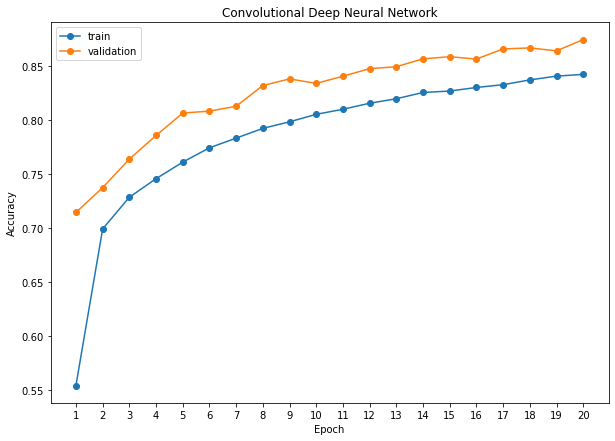

In [19]:
#Plot of accuracy value for training and validation set in each epoch
plt.figure(figsize = (10,7))
hist = train_model.history
x = np.arange(1,21)
plt.plot(x, hist['accuracy'], 'o-', label ='train')
plt.plot(x, hist['val_accuracy'], 'o-', label = 'validation')
plt.xticks(x)
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.title('Convolutional Deep Neural Network')
plt.legend();

In [20]:
#Checking fit metrics across all classes
predicted_classes = np.argmax(model.predict(X_test), axis=1)
labels = {0 : "T-shirt/top", 1: "Trousers", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
target_names = ["Class {} ({}) :".format(i, labels[i]) for i in range(CLASSES)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.79      0.86      0.83      1000
   Class 1 (Trousers) :       0.99      0.97      0.98      1000
   Class 2 (Pullover) :       0.75      0.78      0.76      1000
      Class 3 (Dress) :       0.87      0.89      0.88      1000
       Class 4 (Coat) :       0.71      0.82      0.76      1000
     Class 5 (Sandal) :       0.97      0.96      0.96      1000
      Class 6 (Shirt) :       0.69      0.47      0.56      1000
    Class 7 (Sneaker) :       0.92      0.96      0.94      1000
        Class 8 (Bag) :       0.96      0.96      0.96      1000
 Class 9 (Ankle Boot) :       0.96      0.93      0.95      1000

               accuracy                           0.86     10000
              macro avg       0.86      0.86      0.86     10000
           weighted avg       0.86      0.86      0.86     10000



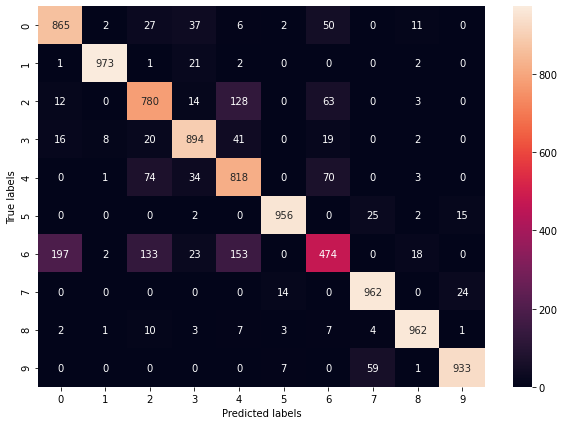

In [21]:
#Multiclass onfusion matrix (heatmap)
confmat = pd.crosstab(pd.Series(y_test, name="True labels"),
                      pd.Series(predicted_classes, name="Predicted labels"))
plt.figure(figsize = (10,7))
sns.heatmap(confmat, annot=True, fmt='g');

As f1-score combine both precision and recall let's focus on analyzing that metric.
By looking on f1-score we can see that some classes were predicted better than other.

Shirt is similar to T-shirt, so model may have problem with distingushing those two.

In [22]:
#Save model for deployment
model.save('FMNIST_Model.h5')

In [23]:
#Saving first observation from the training data into CSV file
np.savetxt('observation.csv', X_train[0]*255, delimiter=',', fmt='%g')

In [24]:
y_train[0]

9

## Model deployment

Model is embedded into Flask web service and exposed on the localhost.

In [29]:
import flask
import tensorflow
import numpy as np

app = flask.Flask(__name__)
model = None

def load_model():
    global model 
    model = tensorflow.keras.models.load_model('FMNIST_Model.h5')

@app.route("/")
def hello():
    return "This is Fashion MNIST prediction app. Use <b>/predict</b> endpoint with POST request e.g. <br><br> curl -X POST -F image=@observation.csv 'http://localhost:5000/predict'"

@app.route("/predict", methods=["POST"])
def predict():
    data = {"success": False}
    if flask.request.method == "POST":
        if flask.request.files.get("image"):
            image = np.genfromtxt(flask.request.files["image"], delimiter=',')/255
            image = image.reshape(1,28, 28, 1)
            preds = model.predict(image).tolist()[0]
            data["predictions"] = []
            for (label, prob) in enumerate(preds):
                r = {"label": label, "probability": float(prob)}
                data["predictions"].append(r)
            data["success"] = True

    return flask.jsonify(data)
if __name__ == "__main__":
    print("* Loading Keras model and Flask server...")
    load_model()
    app.run(host='0.0.0.0',threaded=False)

* Loading Keras model and Flask server...
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)


In [26]:
!curl -X POST -F image=@observation.csv 'http://localhost:5000/predict' | jq

'jq' is not recognized as an internal or external command,
operable program or batch file.


The app can also be launched in terminal by switching working directory to `keras-app` folder and running
```shell
python app.py
```

To make the model deployment maintainable and scalable, the app can be containerized e.g. using Docker. Containers are easy to distribute and run on multiple machines. The containers can also be run on public cloud services such as [Cloud Run](https://cloud.google.com/run) - the managed services make it easier to monitor and maintain the ML applications.

In [27]:
!curl -X POST -F image=@observation.csv 'https://fmnist-service-gkgytk6vja-lm.a.run.app/predict' | jq

'jq' is not recognized as an internal or external command,
operable program or batch file.
